In [ ]:
# Manpreet Singh
# 300045244

### Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import statistics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

### Load dataset

In [27]:
news_df = pd.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv")
# news_df.head()

### Data Visualization and Analysis

In [28]:
# shredding the whitespaces in the dataset columns
columns = [col.strip() for col in news_df.columns]
news_df.columns = columns

In [29]:
# removing the 'url' and 'timedelta' column as they are non-predictive
news_df.drop(['url', 'timedelta'], axis=1, inplace=True)

In [55]:
news_df.columns


Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

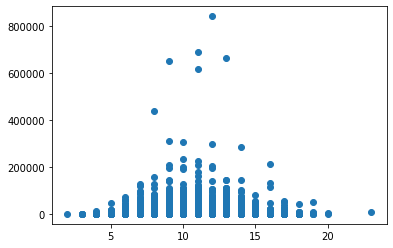

In [54]:
# scatter plots to see the correlation between the target and other features
y = news_df['shares']
x = news_df['n_tokens_title']
# x = news_df['n_non_stop_words']
# x = news_df['n_unique_tokens']
# x = news_df['num_self_hrefs']
# x = news_df['max_positive_polarity']
# x = news_df['max_negative_polarity']
# x = news_df['avg_positive_polarity']
# x = news_df['title_subjectivity']
# x = news_df['global_rate_positive_words']
# x = news_df['abs_title_sentiment_polarity']
plt.scatter(x, y);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017357623B00>,
      dtype=object)

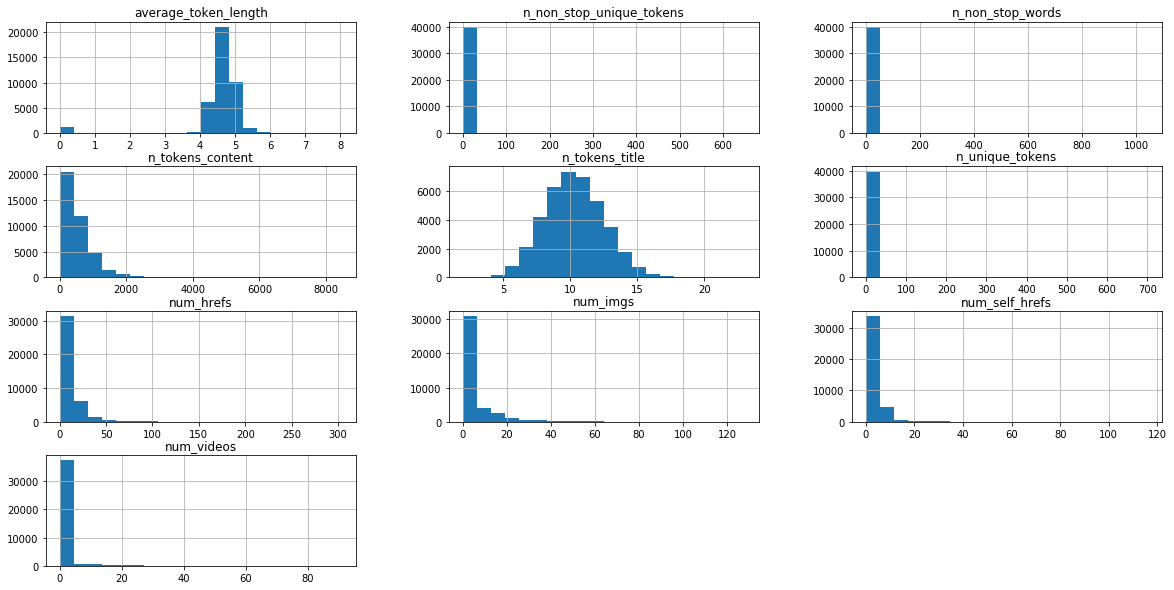

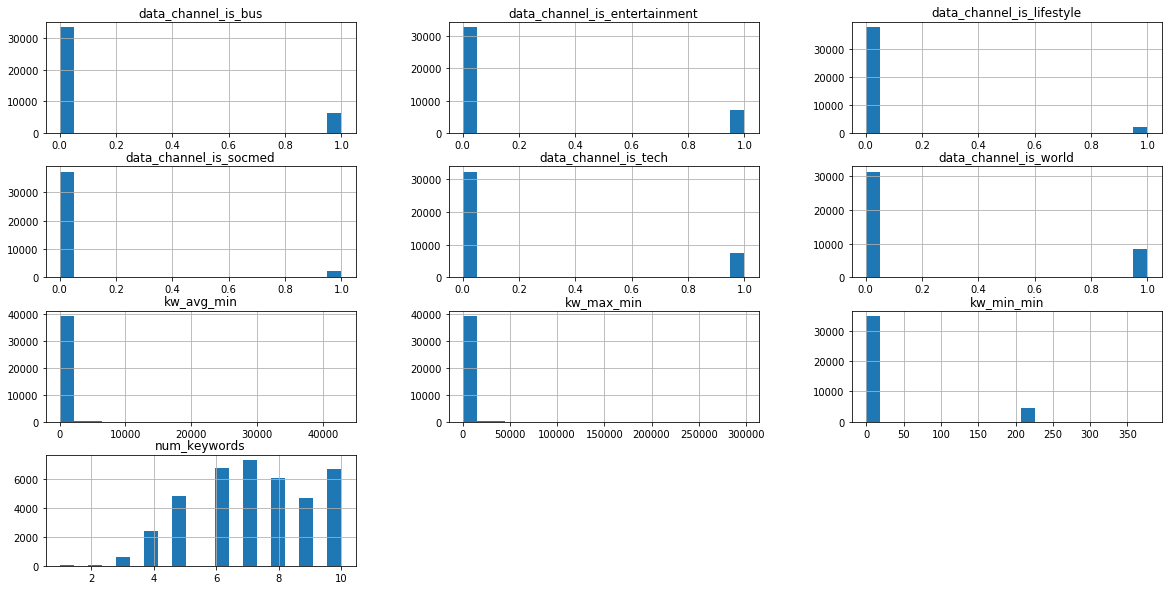

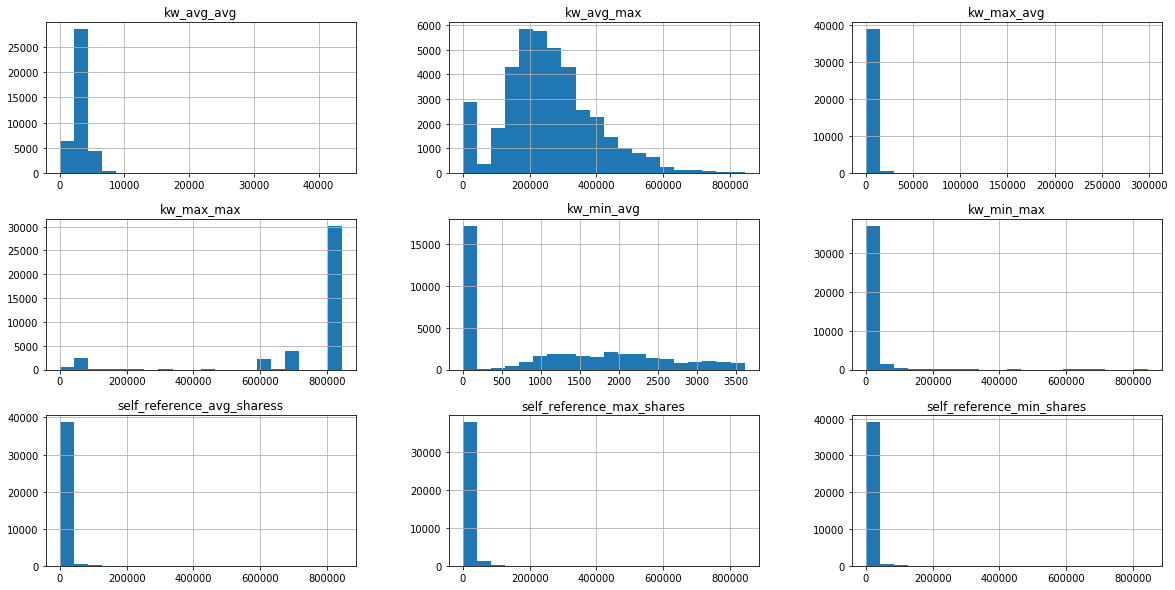

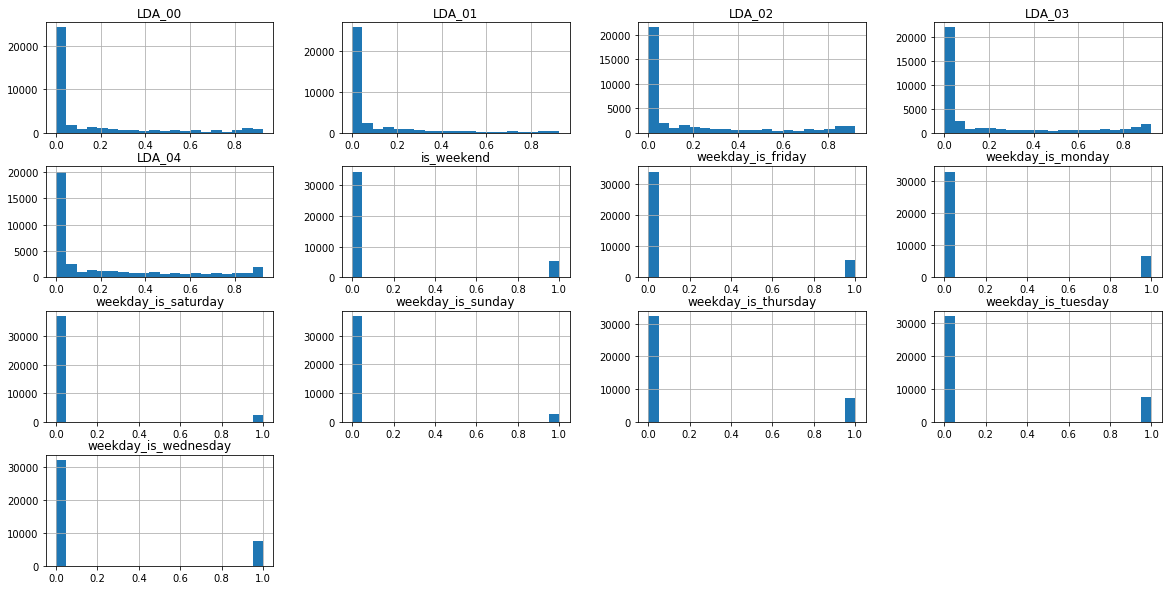

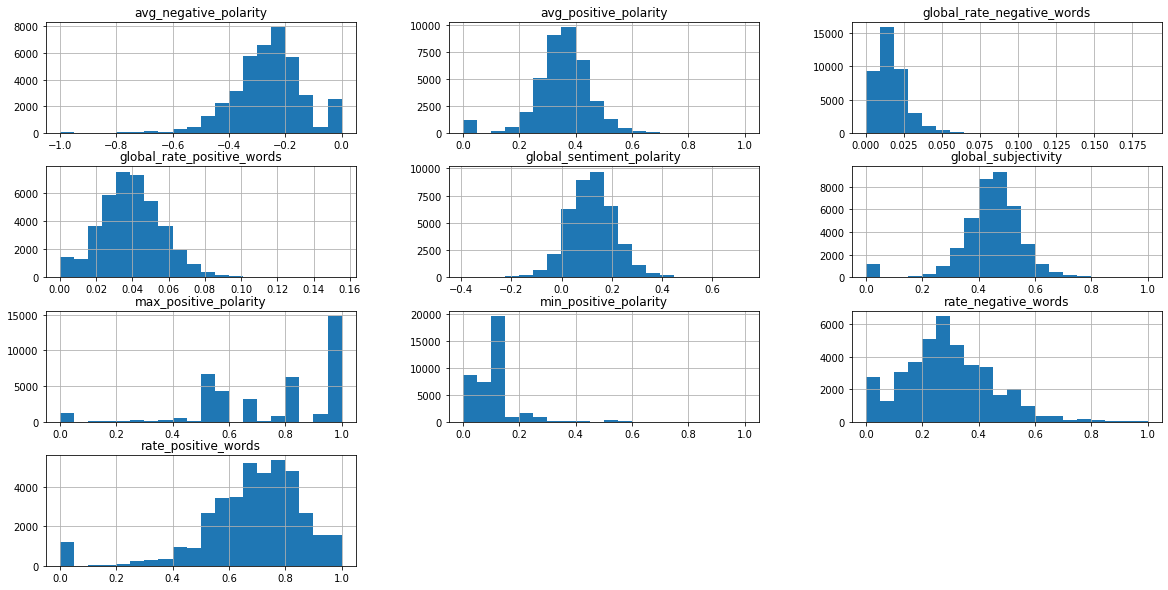

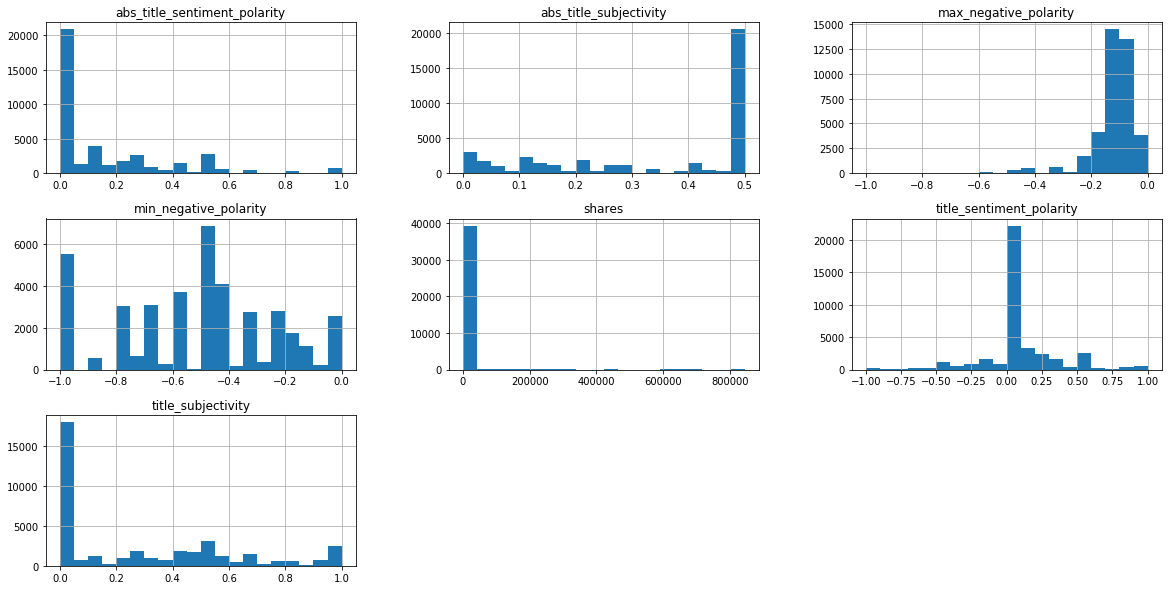

In [31]:
# Since we have more than 50 features so to analyze them, we are breaking them into sets to visualize them better
set1 = news_df[['n_tokens_title', 'n_tokens_content','n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length']]
set2 = news_df[['num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min']]
set3 = news_df[['kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares','self_reference_avg_sharess']]
set4 = news_df[['weekday_is_monday', 'weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']]
set5 = news_df[['global_subjectivity','global_sentiment_polarity', 'global_rate_positive_words','global_rate_negative_words',
       'rate_positive_words','rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity']]
set6 = news_df[['min_negative_polarity', 'max_negative_polarity', 'title_subjectivity','title_sentiment_polarity',
       'abs_title_subjectivity','abs_title_sentiment_polarity', 'shares']]
# Pandas Histogram combined
pd.DataFrame.hist(set1, figsize=(20,10), bins=20)
pd.DataFrame.hist(set2, figsize=(20,10), bins=20)
pd.DataFrame.hist(set3, figsize=(20,10), bins=20)
pd.DataFrame.hist(set4, figsize=(20,10), bins=20)
pd.DataFrame.hist(set5, figsize=(20,10), bins=20)
pd.DataFrame.hist(set6, figsize=(20,10), bins=20)

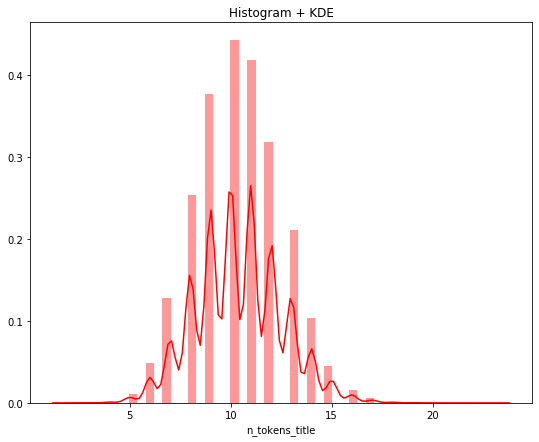

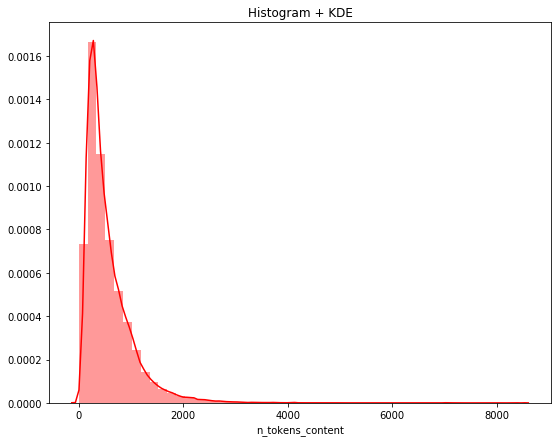

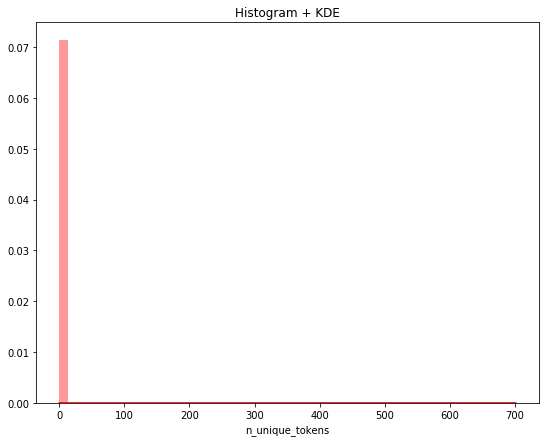

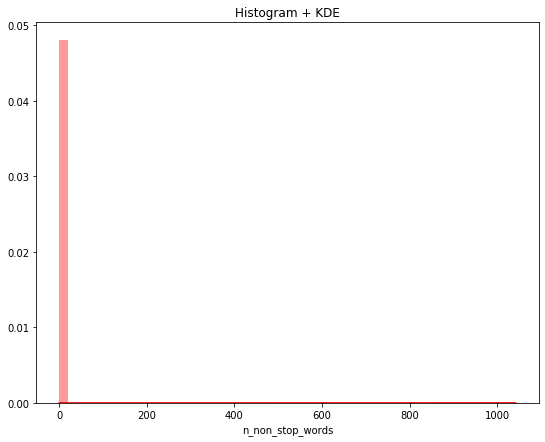

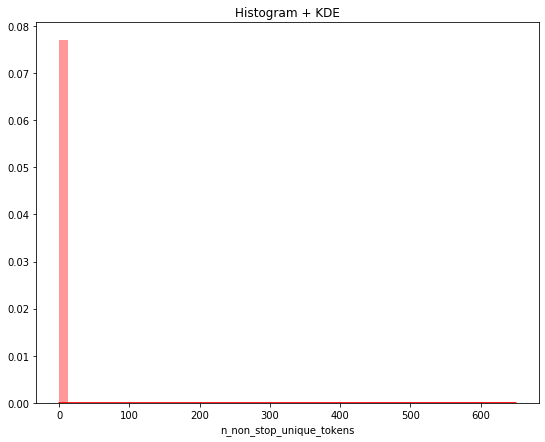

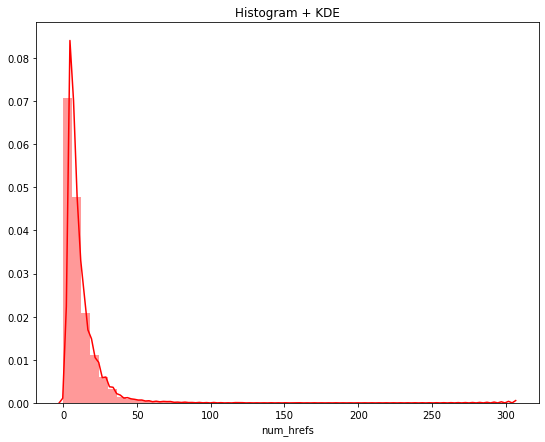

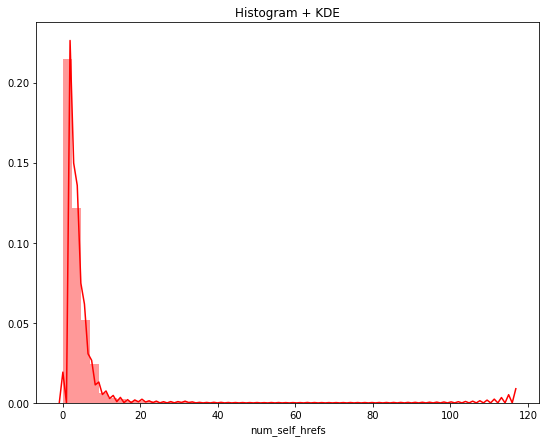

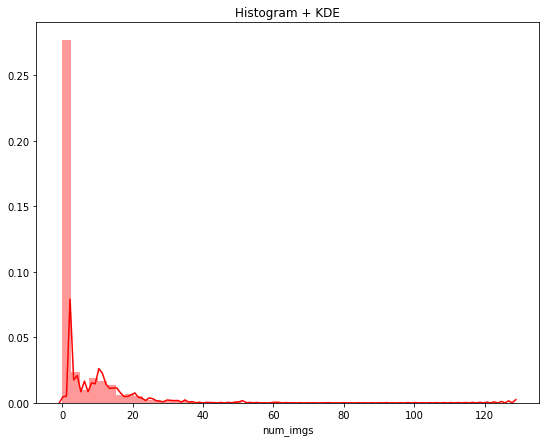

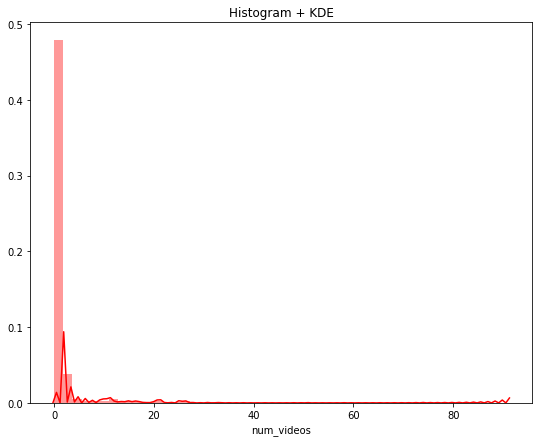

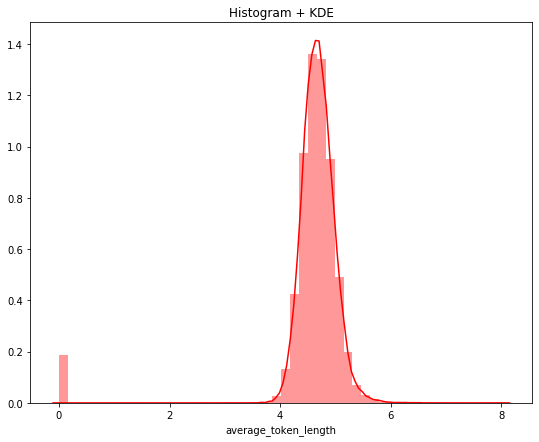

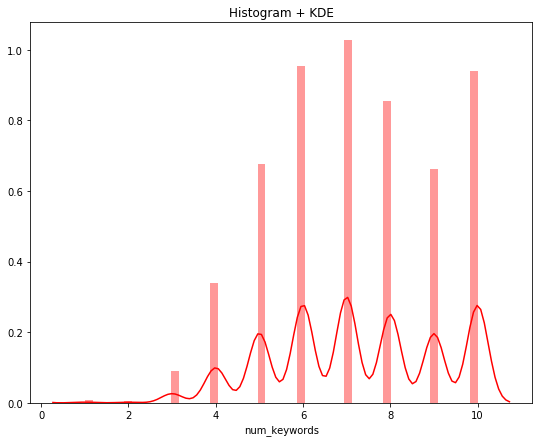

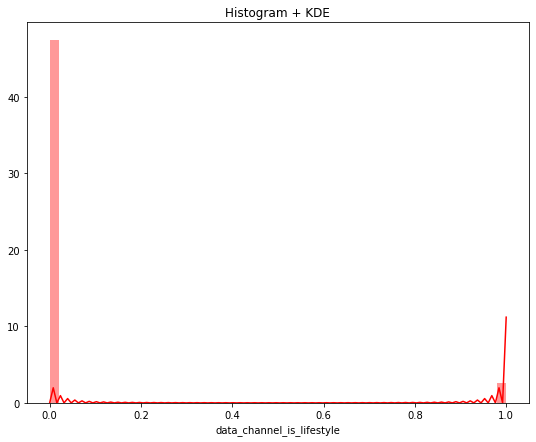

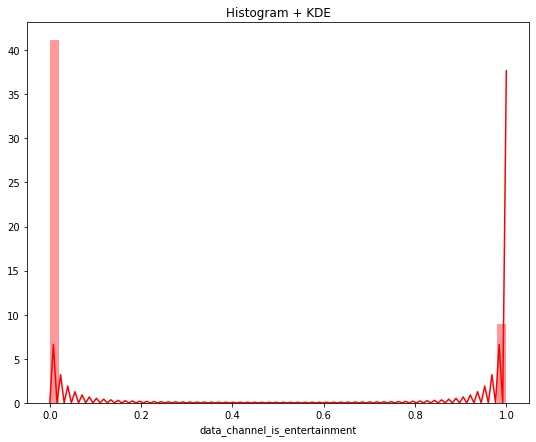

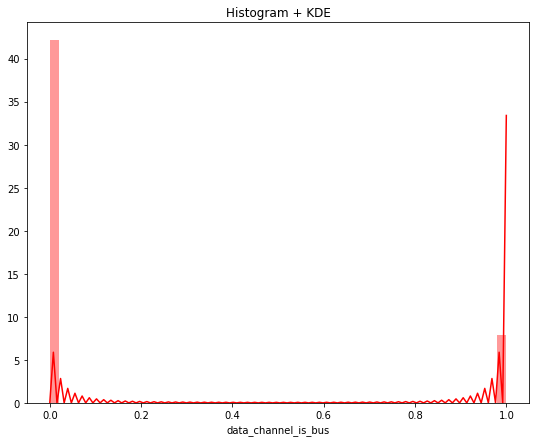

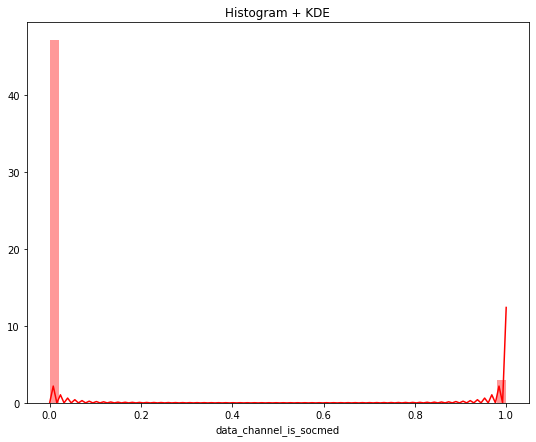

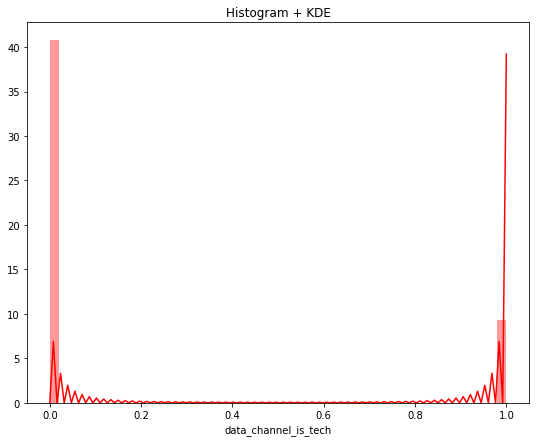

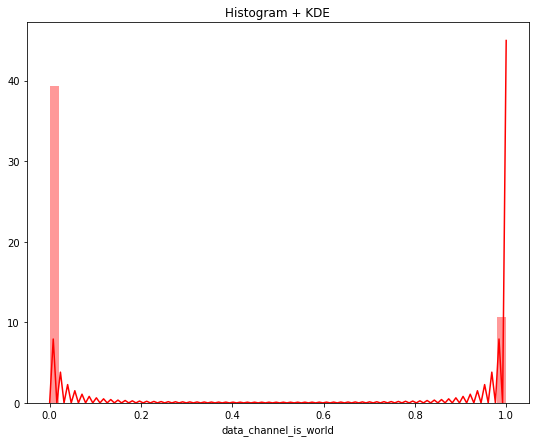

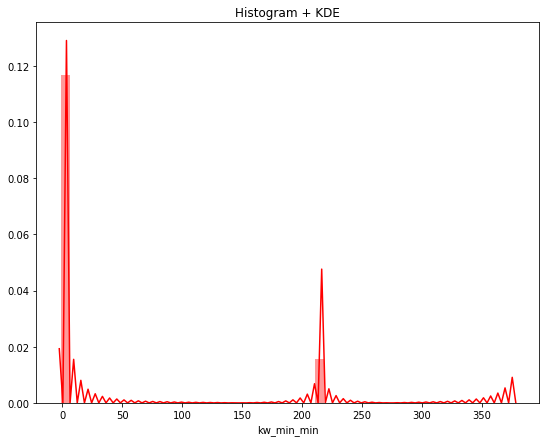

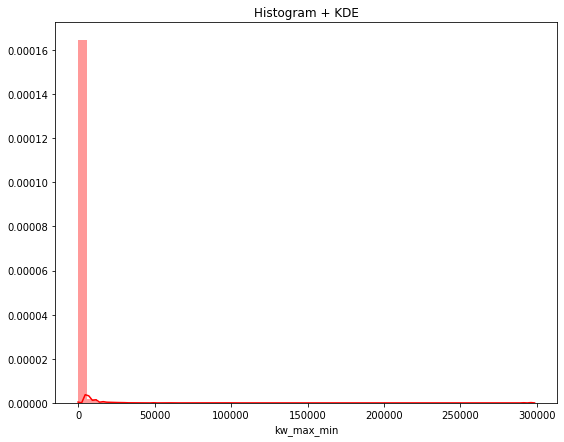

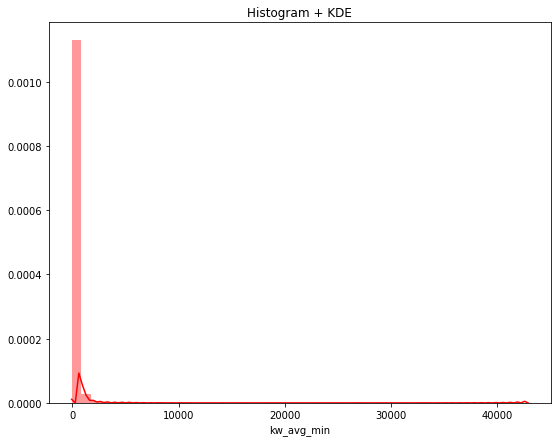

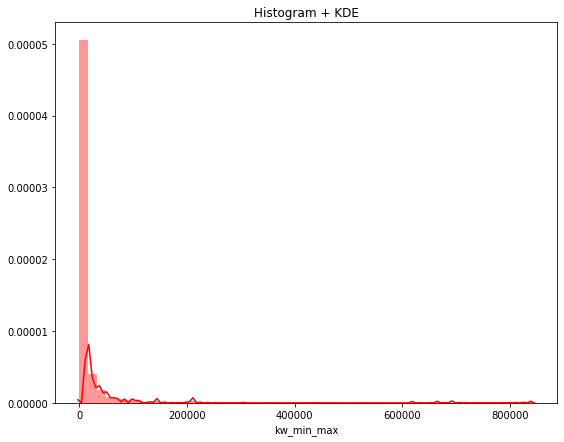

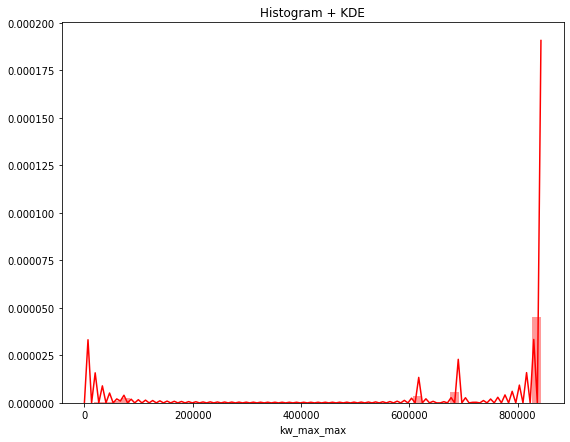

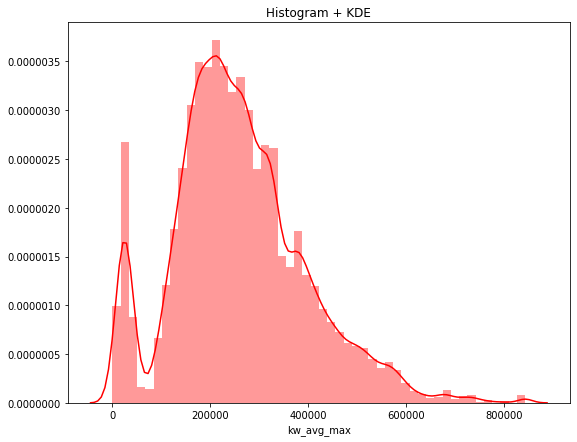

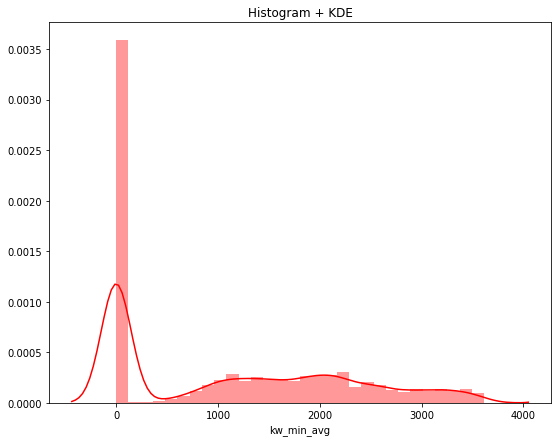

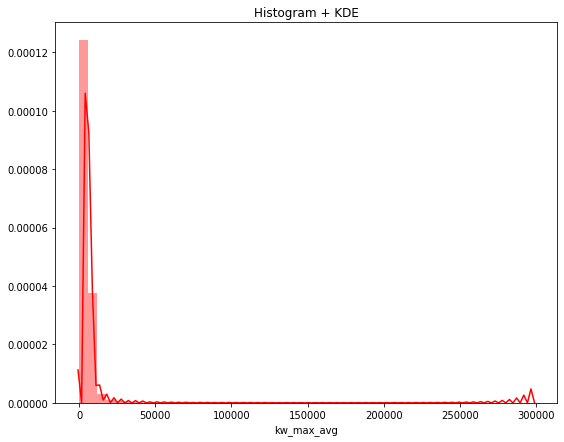

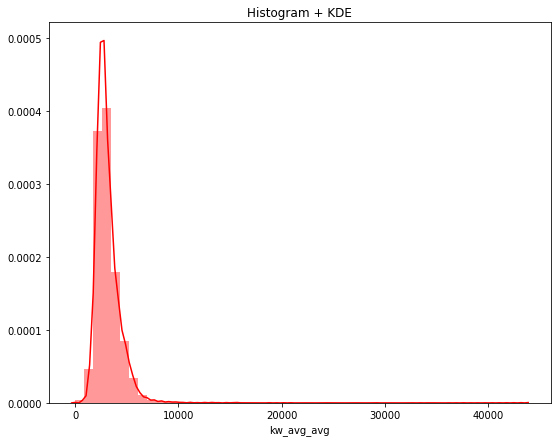

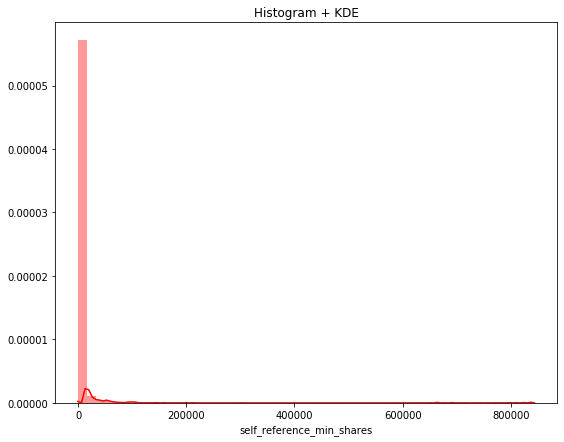

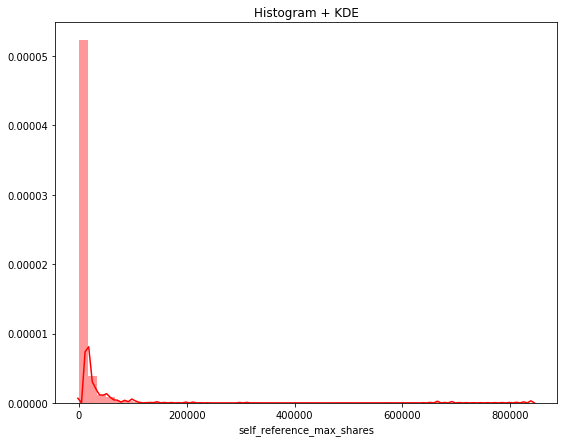

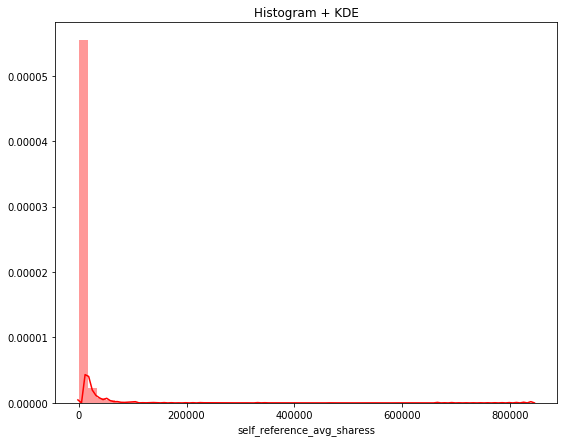

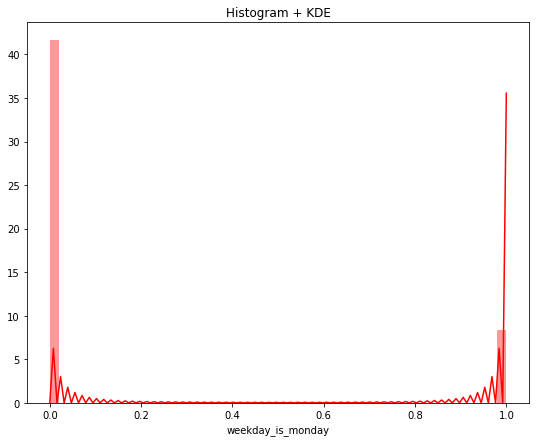

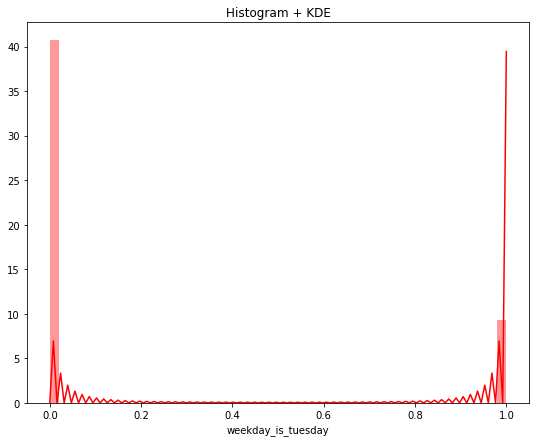

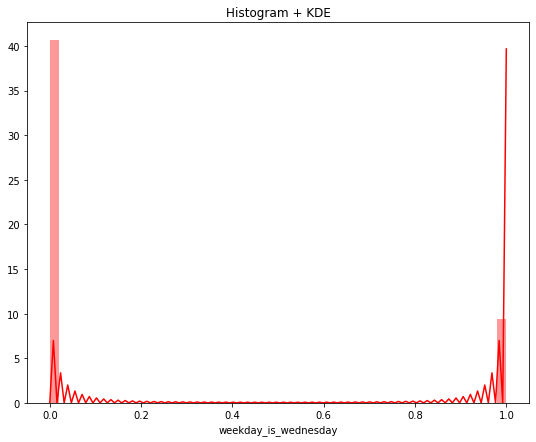

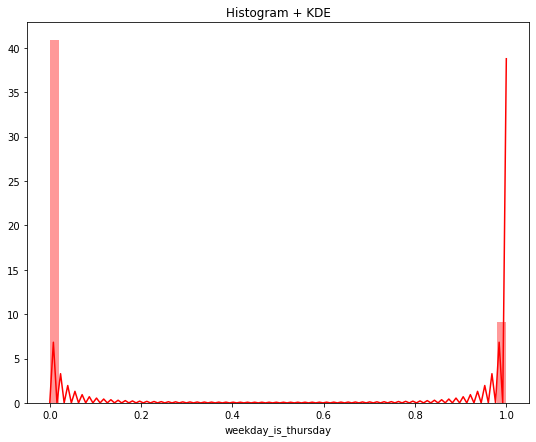

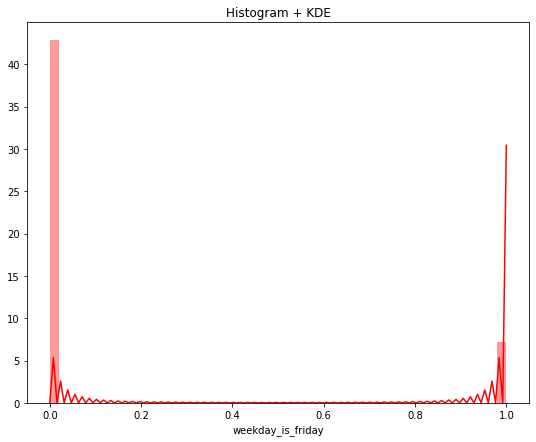

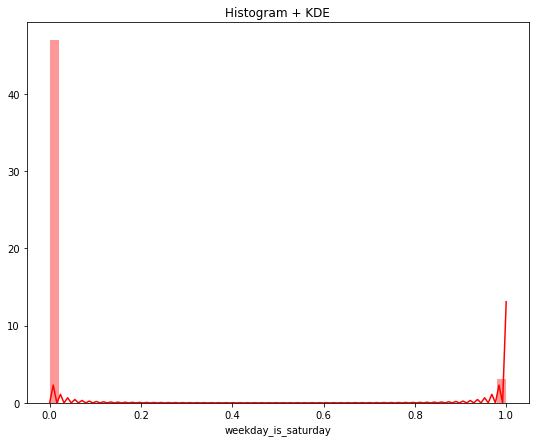

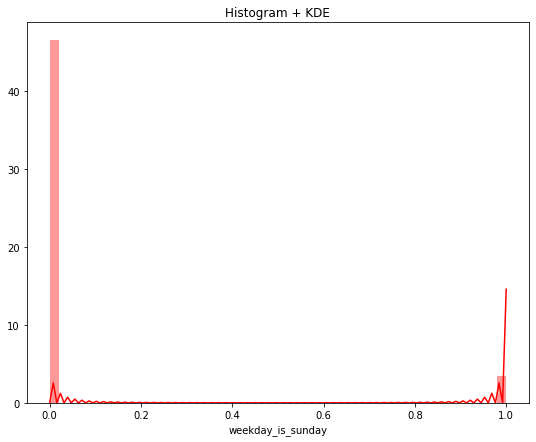

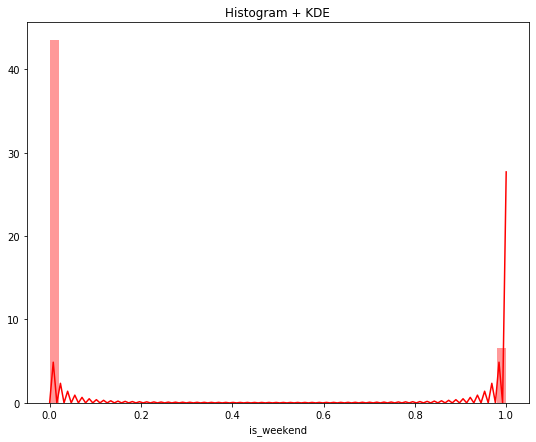

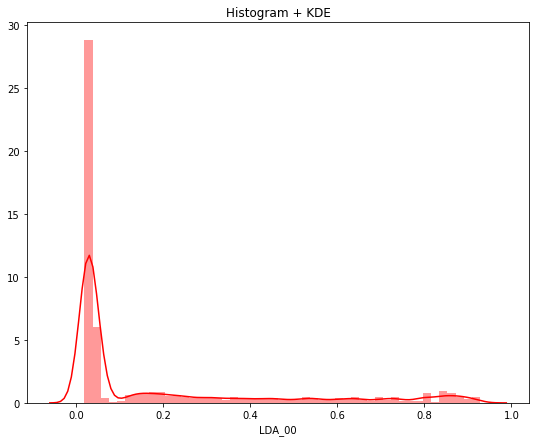

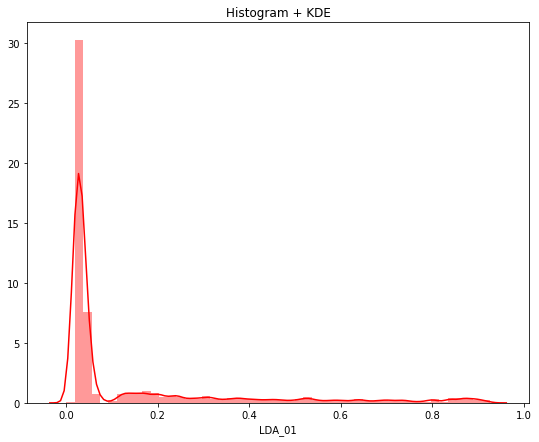

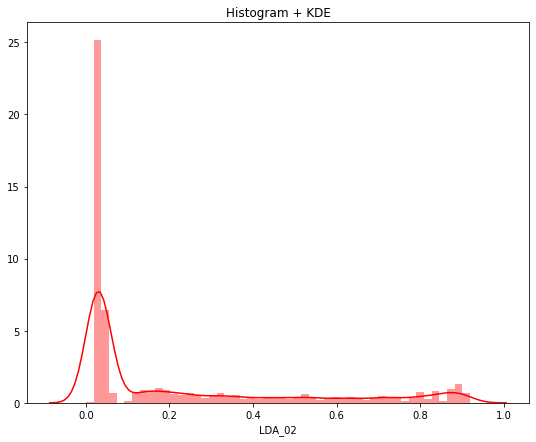

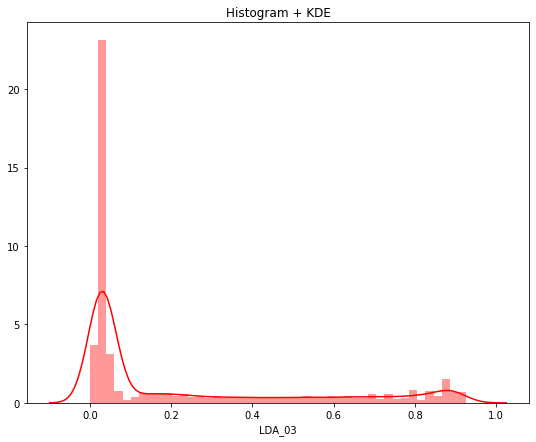

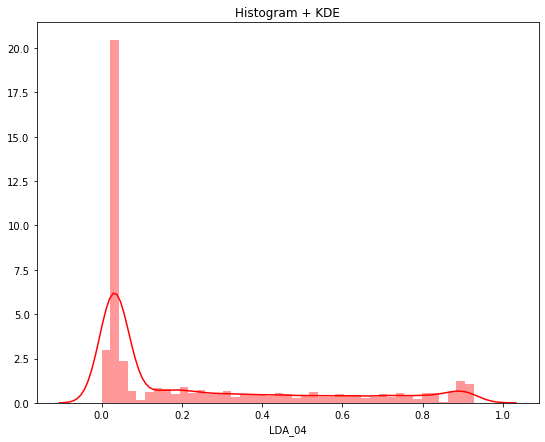

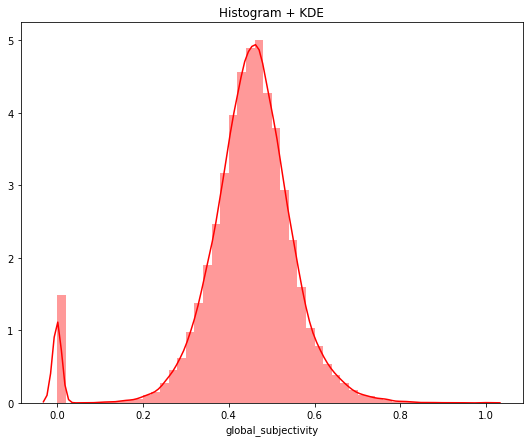

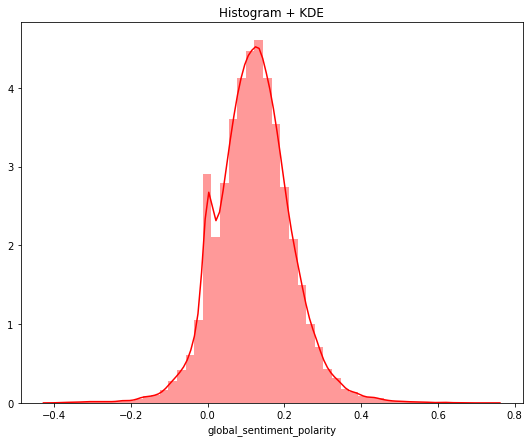

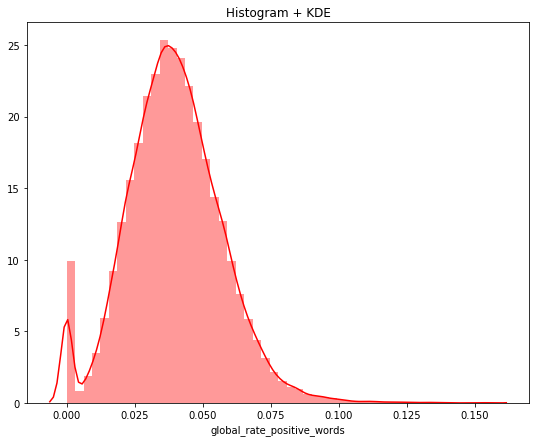

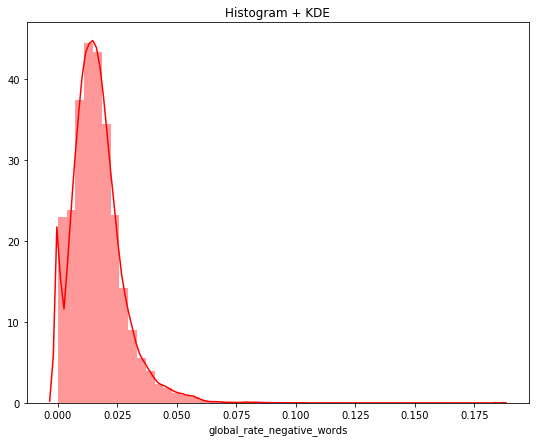

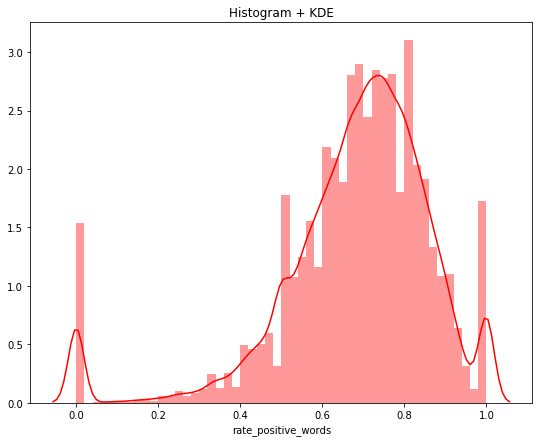

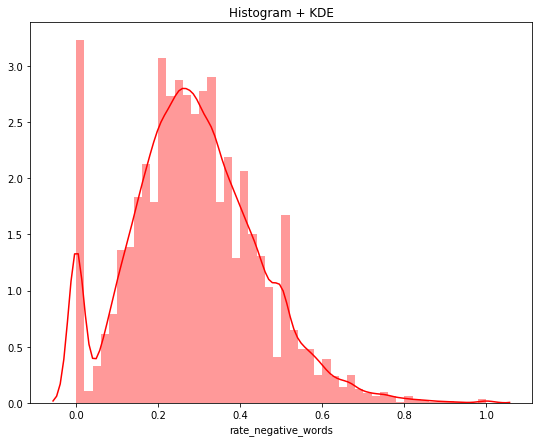

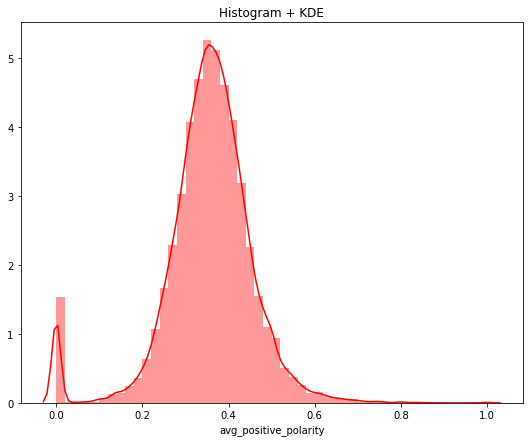

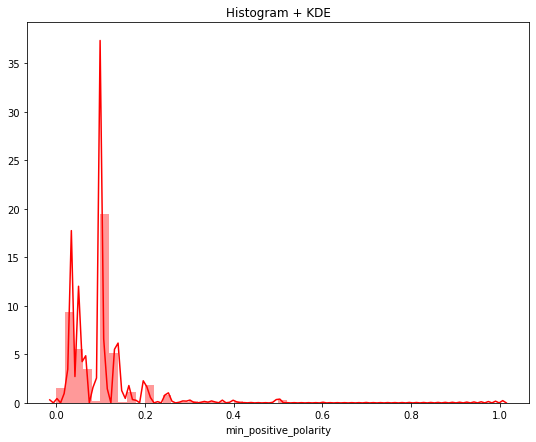

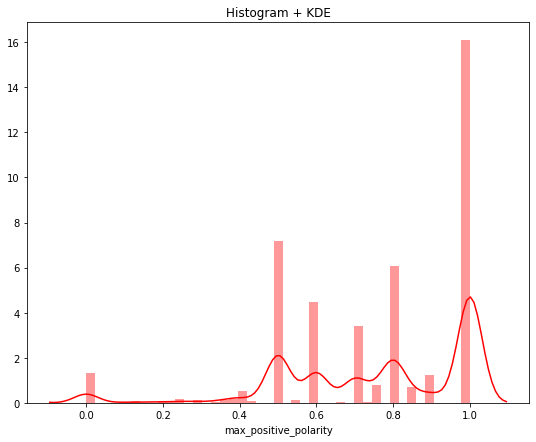

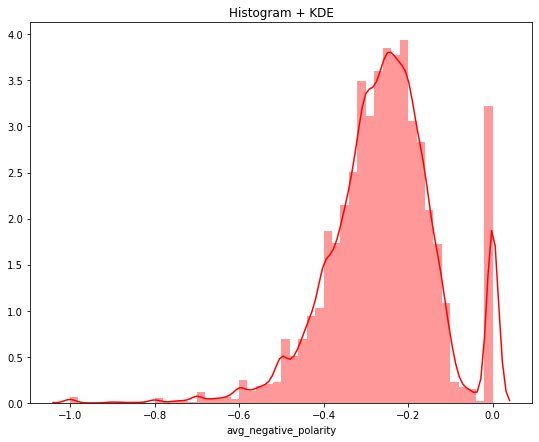

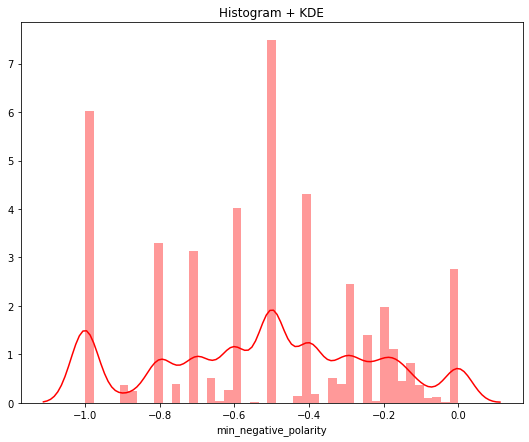

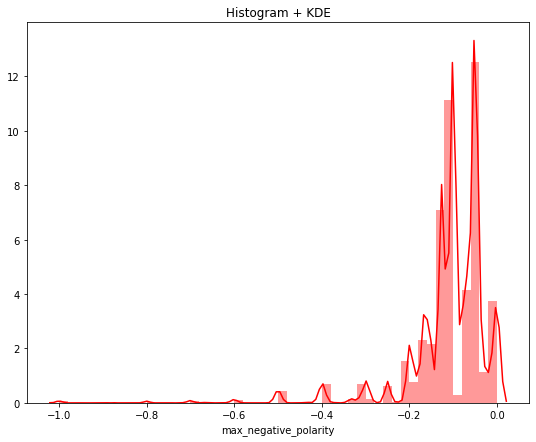

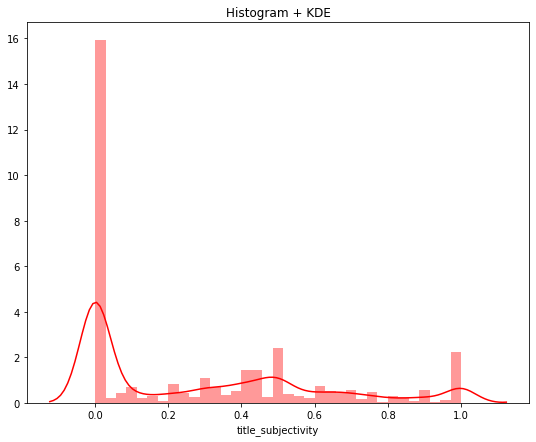

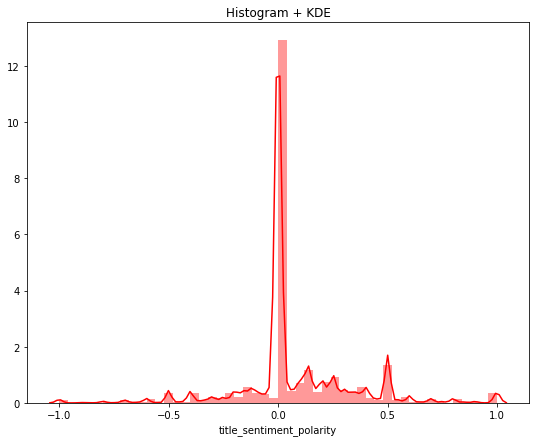

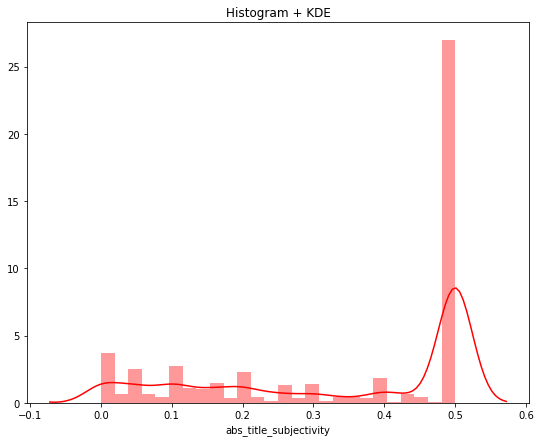

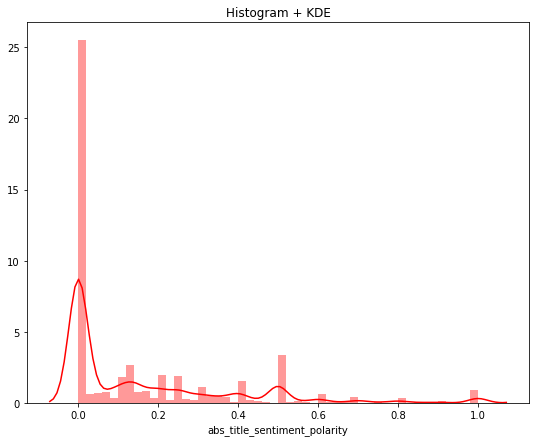

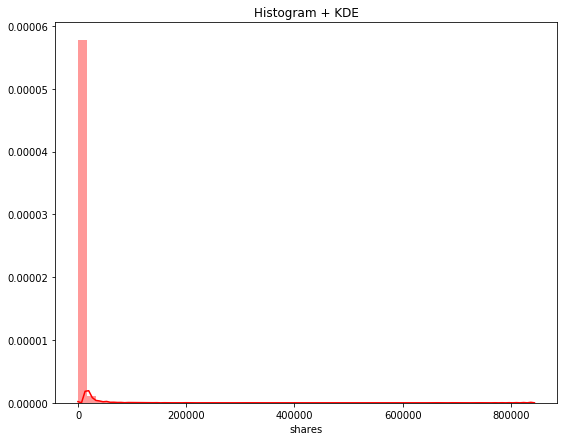

In [34]:
# Seaborn plots
for col in news_df:
    plt.figure(figsize=(9,7))
    sb.distplot(news_df[col], color='r',kde=True, rug=False)
    plt.title('Histogram + KDE')
    plt.show()

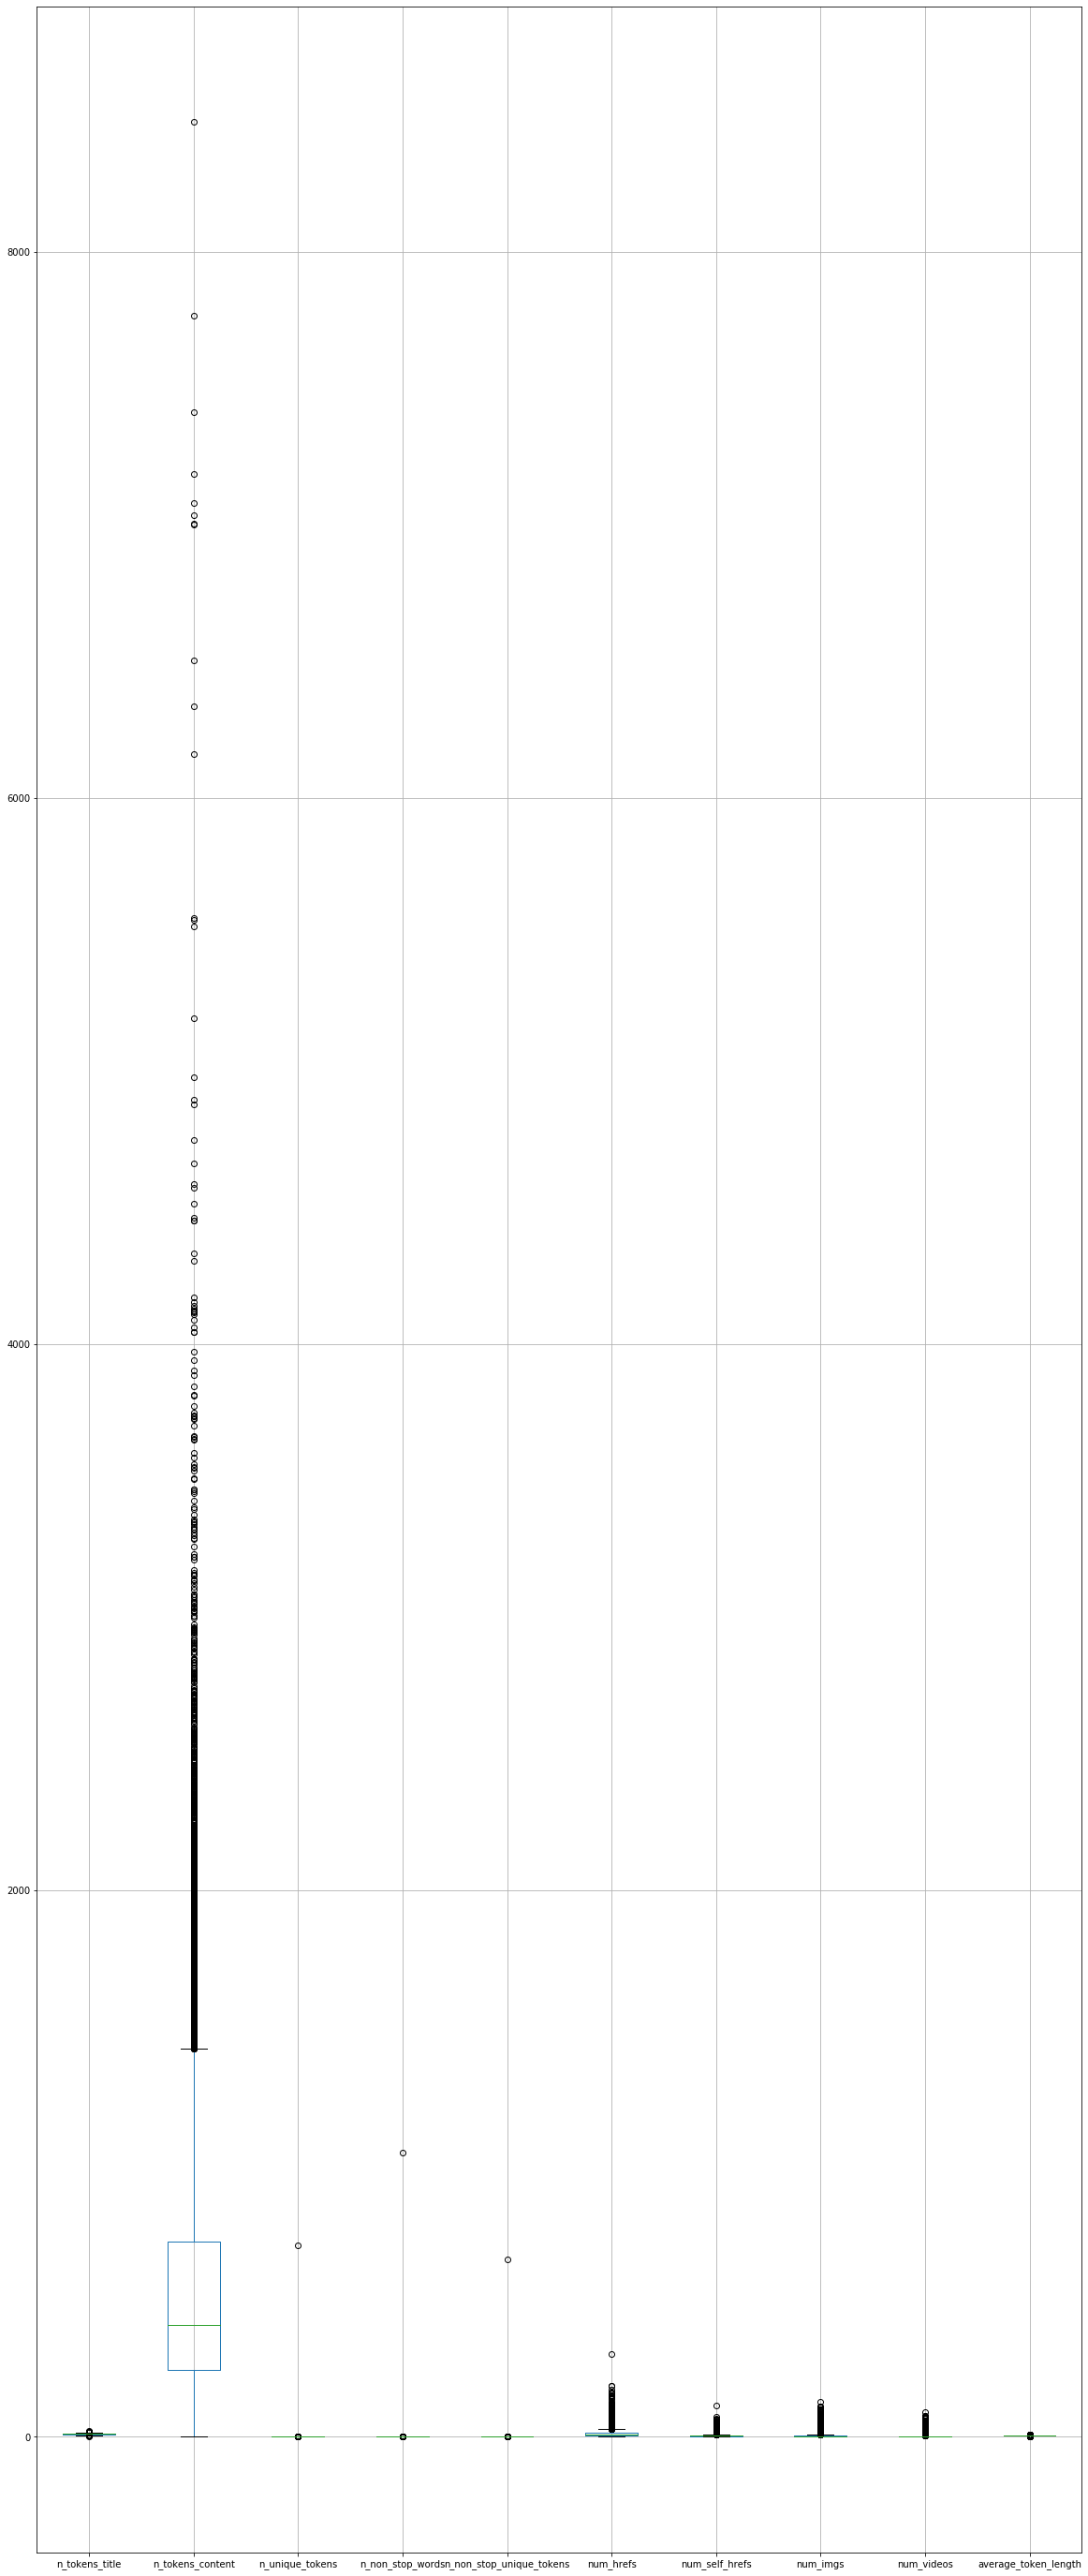

In [49]:
# Matplotlib Boxplots
news_df.boxplot(figsize=(20,50), column=['n_tokens_title', 'n_tokens_content','n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length'])

# news_df.boxplot(figsize=(25,50), column=['num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus',
#        'data_channel_is_socmed', 'data_channel_is_tech','data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min'])

# news_df.boxplot(figsize=(20,50), column=['kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
#        'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares','self_reference_avg_sharess'])

# news_df.boxplot(figsize=(20,50), column=['weekday_is_monday', 'weekday_is_tuesday','weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
#        'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00','LDA_01', 'LDA_02', 'LDA_03', 'LDA_04'])

# news_df.boxplot(figsize=(20,50), column=['global_subjectivity','global_sentiment_polarity', 'global_rate_positive_words','global_rate_negative_words',
#        'rate_positive_words','rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
#        'max_positive_polarity', 'avg_negative_polarity'])

# news_df.boxplot(figsize=(20,50), column=['min_negative_polarity', 'max_negative_polarity', 'title_subjectivity','title_sentiment_polarity',
#        'abs_title_subjectivity','abs_title_sentiment_polarity', 'shares'])

In [5]:
# changing the continuous target class to binary
news_df.loc[news_df['shares'] < 1500, 'shares'] = 0
news_df.loc[news_df['shares'] >= 1500, 'shares'] = 1

In [6]:
# news_df['shares'].value_counts()
pca_df = news_df.copy(deep=True)
pca_df.drop(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'], axis=1, inplace=True)

In [7]:
X = news_df.copy(deep=True)
X.drop(['shares'], axis=1, inplace=True)
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = scaler.fit_transform(X)
y = [0,1]
target_names = ['negative', 'positive']

In [8]:
# Ref- https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html
# PCA
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

pca_df['pca-one'] = X_r[:,0]
pca_df['pca-two'] = X_r[:,1] 

In [9]:
pca_df.head(10)

,shares,pca-one,pca-two
0,0,-0.501023,-0.608870
1,0,-0.259269,0.082265
2,1,-0.326349,0.385108
3,0,0.033459,-0.371754
4,0,-0.559940,1.016345
5,0,-0.442769,0.805298
6,0,-0.206360,0.633828
7,0,-0.388392,0.841814
8,1,-0.359814,0.930965
9,0,1.207636,0.082811


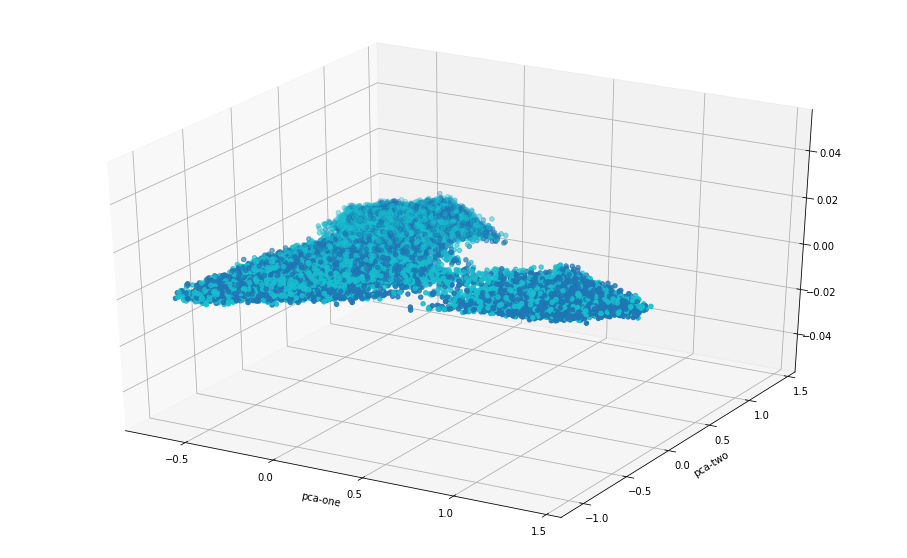

In [10]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_df.loc[:,:]["pca-one"], 
    ys=pca_df.loc[:,:]["pca-two"], 
    #c=labels.loc[rndperm,:]["labels"], 
    #c = 'r',
    c= pca_df.loc[:,:]["shares"],
    #legend="full",
    cmap='tab10'
)

ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
plt.show()